# Table of Contents
* [Introduction](#Introduction)
    * [Dataset Descriptions](#Dataset_Descriptions)
* [Data Wrangling](#Data_Wrangling)
    * [Assess](#assess)
        * [Yellow Taxi](#yellow_taxi)

            * [Comments](#comments_assess)  
* [Data Cleaning](#data_cleaning)

* [Explanatory Data Analysis](#eda)
  
* [Outlier Analysis](#outliers)
  * [Comments](#outliers_comments)

## Introduction <a class="anchor" id="Introduction"></a>

This Jupyter Notebook is dedicated to analyzing municipal expenditures on Snow and Ice removal in the year 2022.

The primary objectives of this analysis are as follows:

1. Using Python, perform EDA on the taxi data from the New York City TLC to get a general understanding of what taxi ridership looks like
2. I would suggest at the very least a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. Whatever you think makes the most sense. 

3. Additionally, the management team has recently asked all EDA to include Tableau visualizations. We’ve found these to be particularly helpful in status reports to the client and board members. Make sure it is easy to understand to someone who isn’t data savvy and remember that the assistant director at the New York City TLC is a person with visual impairments.

4. it would be really helpful if you included an executive summary of your analysis attached via email. 

### Dataset Descriptions  <a id="Dataset_Descriptions"></a>


#### Column Explanations:
**ID** Trip identification number

**VendorID** A code indicating the TPEP provider that provided the record.  

    * 1= Creative Mobile Technologies, LLC; 

    * 2= VeriFone Inc.

**tpep_pickup_datetime** The date and time when the meter was engaged. 

**tpep_dropoff_datetime**  The date and time when the meter was disengaged. 

**Passenger_count** The number of passengers in the vehicle.  

    * This is a driver-entered value.

**Trip_distance** The elapsed trip distance in miles reported by the taximeter.

**PULocationID** TLC Taxi Zone in which the taximeter was engaged

**DOLocationID** TLC Taxi Zone in which the taximeter was disengaged

**RateCodeID**  The final rate code in effect at the end of the trip. 

    * 1= Standard rate 

    * 2=JFK 

    * 3=Newark 

    * 4=Nassau or Westchester 

    * 5=Negotiated fare 

    * 6=Group ride

**Store_and_fwd_flag** This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. 

    * Y= store and forward trip 

    * N= not a store and forward trip

**Payment_type**  A numeric code signifying how the passenger paid for the trip.  

    * 1= Credit card 

    * 2= Cash 

    * 3= No charge 

    * 4= Dispute 

    * 5= Unknown 

    * 6= Voided trip

**Fare_amount** The time-and-distance fare is calculated by the meter.

**Extra** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

**MTA_tax**  $0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Improvement_surcharge**  $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Tip_amount**  Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

**Tolls_amount** Total amount of all tolls paid in trip. 

**Total_amount** The total amount charged to passengers. Does not include cash tips.

# Data Wrangling <a id="Data_Wrangling"></a>

### Import Necessities

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
#import plotly.express as px
from helpers.data_prep import * # This module contains user-defined functions for data preparation
from helpers.eda import * # This module contains user-defined functions for Exploratory data analysis
from pathlib import Path
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)

In [2]:
# Code to save the figures as high-res PNGs
IMAGES_PATH = Path() / "images" / "snow_ice_removal_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Gather

In [3]:
df = pd.read_csv("dataset/2017_Yellow_Taxi_Trip_Data.csv")

## Assess <a id="assess"></a>

#### Yellow Taxi <a id="yellow_taxi"></a>

In [4]:
check_df(df, head=5, tail=5, detail=True)

##################### Index #####################
RangeIndex(start=0, stop=22699, step=1)
##################### Shape #####################
(22699, 18)
##################### Types #####################
Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object
##################### Head #####################
   Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:

### Comments <a id="comments_assess"></a>
#### Quality
##### `Yellow Taxi` table

* Shape: the dataset contains 22699 rows and 18 columns
* There are no missing values
**Data types**  
    * tpep_pickup_datetime and tpep_dropoff_datetime need to convert to the datetime type. 
* 'DOR Code' is a unique id (can be used for data merging), and 'Municipality' could be used as a composite key with 'DOR Code'.
* 2022(Population): This variable has a high variance (std. deviation is quite high relative to the mean). This indicates a mix of small and large municipalities.
* Zero value in, trip_distance and passenger_count.
*  Negative values in, fare_amount, extra, mta_tax,  improvement_surcharge, and total_amount. These probably from ride refunds. 
*  Some variance in the data.

#### Tidiness
* We don't have messy data (no action required)
  
##### Actions
* tpep_pickup_datetime and tpep_dropoff_datetime need to convert to the datetime type.
* There are some categorical columns shown as a numerical value. 


#### Select visualization type(s)

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

## Data Cleaning <a id="data_cleaning"></a>

#### Define

##### `Yellow Taxi` table
- tpep_pickup_datetime and tpep_dropoff_datetime need to convert to the datetime type.

#### Code

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#### Test

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

#### Define
##### `Yellow Taxi` table
- Make sure that the  'total_amount' columns accurately sum up the individual charges.

#### Code

In [7]:
# Making sure the column values are correct and sum up the  Total Miles
tolerance = 5 # Defined a small tolerance
for index, row in df.iterrows():
    sum_of_columns = row['fare_amount'] + row['extra'] + row['mta_tax'] + row['tip_amount'] + \
                     row['tolls_amount'] + row['improvement_surcharge']
    assert abs(sum_of_columns - row['total_amount']) <= tolerance, f"Row {index} does not sum up correctly within tolerance"


In [8]:
### I got an error for row 483
###  I got an error for row 2218
df.loc[2218]

Unnamed: 0                          52957220
VendorID                                   2
tpep_pickup_datetime     2017-06-22 06:33:02
tpep_dropoff_datetime    2017-06-22 06:54:52
passenger_count                            5
trip_distance                           8.11
RatecodeID                                 1
store_and_fwd_flag                         N
PULocationID                             107
DOLocationID                             147
payment_type                               1
fare_amount                            26.00
extra                                   0.00
mta_tax                                 0.50
tip_amount                              4.02
tolls_amount                            0.00
improvement_surcharge                   0.30
total_amount                           35.77
Name: 2218, dtype: object

* Probably those are cash tips
*  I will create a column for that.

In [9]:
df['cash_tip'] = df['total_amount'] -  df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + \
                     df['tolls_amount'] + df['improvement_surcharge']

In [10]:
#df[df['cash_tip'] < 0]

#### Define
* Extracting the datetime components

#### Code

In [11]:
# Extracting various datetime components for pickup

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()





#### Test

In [12]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,cash_tip,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,7.12,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,9.60,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,4.50,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,14.38,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,2.60,April,Saturday


#### Define
* Deriving trip duration

#### Code

In [13]:
# Calculating trip duration in time delta (difference between dropoff and pickup)
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Convert trip duration to minutes for easier interpretation
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

#### Test

In [14]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,cash_tip,month,day,trip_duration,trip_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,7.12,March,Saturday,0 days 00:14:04,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,9.60,April,Tuesday,0 days 00:26:30,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,4.50,December,Friday,0 days 00:07:12,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,14.38,May,Sunday,0 days 00:30:15,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,2.60,April,Saturday,0 days 00:16:43,16.72


## Exploratory Data Analysis <a id="eda"></a>

* I defined this function('grab_col_names') to separate column types into three groups: 1. cat_cols represents the categorical columns. 2. num_cols represents the quantitative columns. cat_but_car represents the categorical but cardinal columns which repeat so many times, unlike usual categorical columns. Of course, this function has thresholds for each case it can be set with its arguments. 
* Separating column types is crucial for data visualization and interpretation.

In [69]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

Observations: 22699
Variables: 23
cat_cols: 10
num_cols: 13
cat_but_car: 0
num_but_cat: 7


In [70]:
print(cat_cols)

['store_and_fwd_flag', 'month', 'day', 'VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'extra', 'mta_tax', 'improvement_surcharge']


* Here we see the 'passenger_count', 'extra', 'mta_tax', 'improvement_surcharge', and 'year' categorical columns because they repeated less than 10 times.
*  I add a threshold to my function to find the categorical variable that seems to a quantitative but here it is not the case. Therefore I will move them to the numerical columns.

In [71]:
print(num_cols)

['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'cash_tip', 'trip_duration', 'trip_duration_minutes']


In [72]:
move_cols = ['passenger_count', 'extra', 'mta_tax', 'improvement_surcharge']
num_cols.extend(move_cols)
# Items we want to remove from num_cols
items_to_remove = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 
                    'pickup_day', 'week', 'pickup_hour', 
                   'month', 'dropoff_day', 'dropoff_hour', 'trip_duration']
num_cols = [item for item in num_cols if item not in items_to_remove]
#I remove year column from categorical columns
cat_cols = [col for col in cat_cols if col not in move_cols and col !='year']

In [73]:
print(cat_but_car)

[]


*  Cardinal values seem categorical but they repeat so many times that why I separate them from categorical variables. My threshold in this function is 20, but it can be changed depending on the business need. 

* Here I defined the 'cat_summary' function to analyze categorical variables.

### Analyzing the numerical columns

In [74]:
print(cat_cols)

['store_and_fwd_flag', 'month', 'day', 'VendorID', 'RatecodeID', 'payment_type']


                    store_and_fwd_flag  Ratio
store_and_fwd_flag                           
N                                22600  99.56
Y                                   99   0.44
##########################################


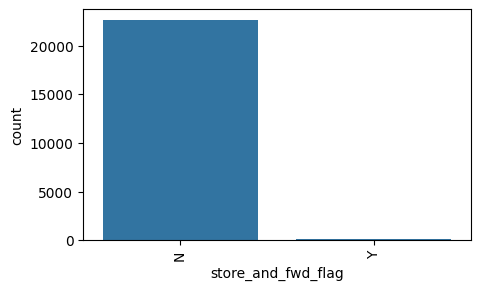

           month  Ratio
month                  
March       2049   9.03
October     2027   8.93
April       2019   8.89
May         2013   8.87
January     1997   8.80
June        1964   8.65
December    1863   8.21
November    1843   8.12
February    1769   7.79
September   1734   7.64
August      1724   7.60
July        1697   7.48
##########################################


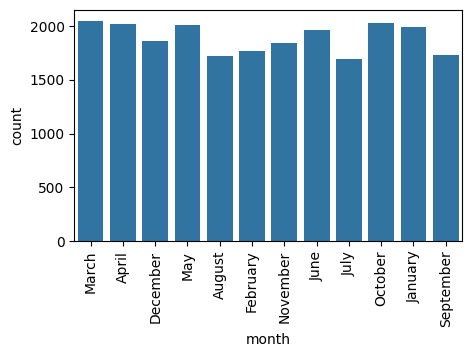

            day  Ratio
day                   
Friday     3413  15.04
Thursday   3402  14.99
Wednesday  3390  14.93
Saturday   3367  14.83
Tuesday    3198  14.09
Sunday     2998  13.21
Monday     2931  12.91
##########################################


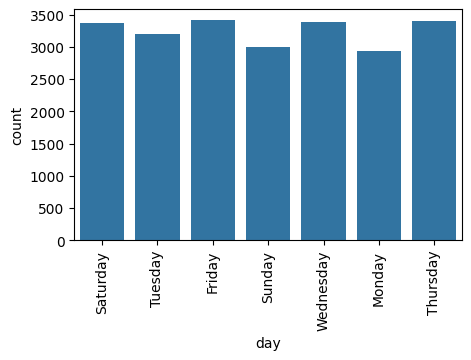

          VendorID  Ratio
VendorID                 
2            12626  55.62
1            10073  44.38
##########################################


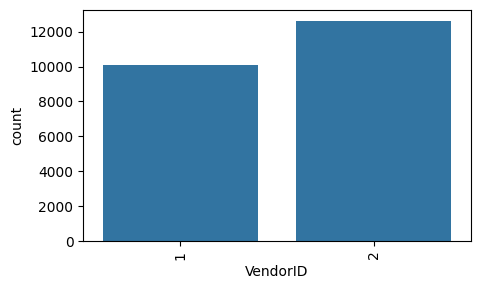

            RatecodeID  Ratio
RatecodeID                   
1                22070  97.23
2                  513   2.26
5                   68   0.30
3                   39   0.17
4                    8   0.04
99                   1   0.00
##########################################


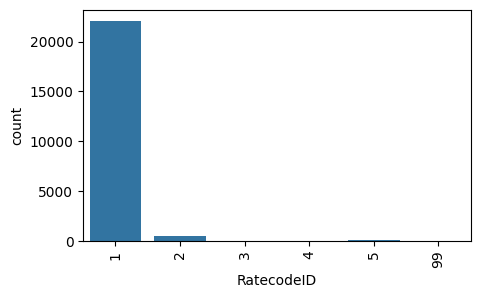

              payment_type  Ratio
payment_type                     
1                    15265  67.25
2                     7267  32.01
3                      121   0.53
4                       46   0.20
##########################################


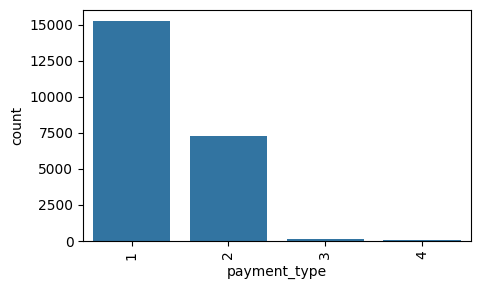

In [75]:
for col_name in cat_cols:
    cat_summary(df, col_name, plot=True)

categorical
* RatecodeID; most rides are standard(97%), there some JFK rides are visible as well(2%). Also, there is one value that seems not correct(99).
* Most payments are made by credit card(67%). 32% of the rides are paid with cash. There are some no-charge and dispute rides as well.
*  Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.
* Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.


### Analyzing the numerical columns

* Here I defined the 'num_summary' function to analyze quantitative variables.

In [76]:
print(num_cols)

['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'cash_tip', 'trip_duration_minutes', 'passenger_count', 'extra', 'mta_tax', 'improvement_surcharge']


##################### trip_distance #####################
##################### Describe #####################
count   22699.00
mean        2.91
std         3.65
min         0.00
25%         0.99
50%         1.61
75%         3.06
max        33.96
Name: trip_distance, dtype: float64 


##################### Total NA #####################
0


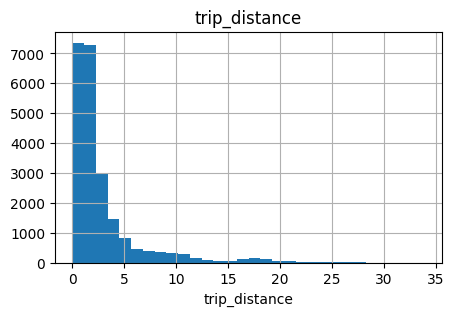

##################### PULocationID #####################
##################### Describe #####################
count   22699.00
mean      162.41
std        66.63
min         1.00
25%       114.00
50%       162.00
75%       233.00
max       265.00
Name: PULocationID, dtype: float64 


##################### Total NA #####################
0


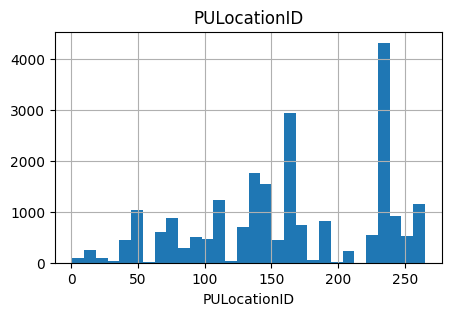

##################### DOLocationID #####################
##################### Describe #####################
count   22699.00
mean      161.53
std        70.14
min         1.00
25%       112.00
50%       162.00
75%       233.00
max       265.00
Name: DOLocationID, dtype: float64 


##################### Total NA #####################
0


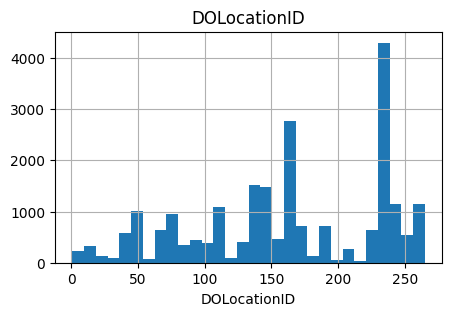

##################### fare_amount #####################
##################### Describe #####################
count   22699.00
mean       13.03
std        13.24
min      -120.00
25%         6.50
50%         9.50
75%        14.50
max       999.99
Name: fare_amount, dtype: float64 


##################### Total NA #####################
0


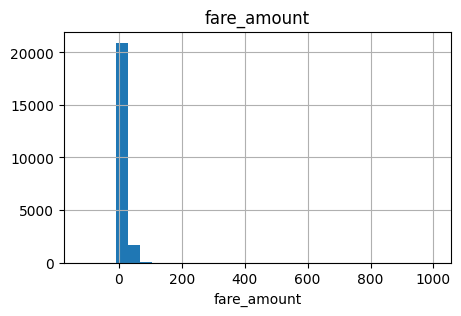

##################### tip_amount #####################
##################### Describe #####################
count   22699.00
mean        1.84
std         2.80
min         0.00
25%         0.00
50%         1.35
75%         2.45
max       200.00
Name: tip_amount, dtype: float64 


##################### Total NA #####################
0


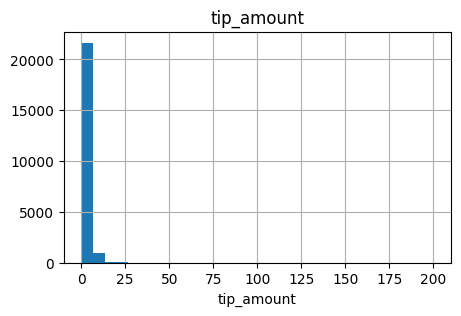

##################### tolls_amount #####################
##################### Describe #####################
count   22699.00
mean        0.31
std         1.40
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        19.10
Name: tolls_amount, dtype: float64 


##################### Total NA #####################
0


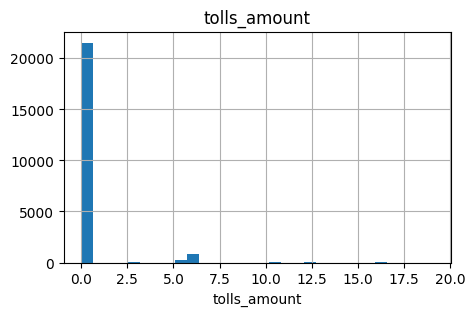

##################### total_amount #####################
##################### Describe #####################
count   22699.00
mean       16.31
std        16.10
min      -120.30
25%         8.75
50%        11.80
75%        17.80
max      1200.29
Name: total_amount, dtype: float64 


##################### Total NA #####################
0


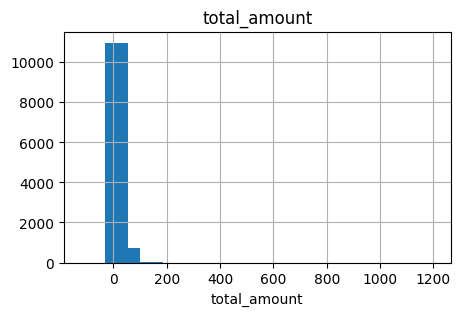

##################### cash_tip #####################
##################### Describe #####################
count   22699.00
mean        6.56
std         7.36
min        -3.60
25%         2.60
50%         5.00
75%         7.52
max       400.60
Name: cash_tip, dtype: float64 


##################### Total NA #####################
0


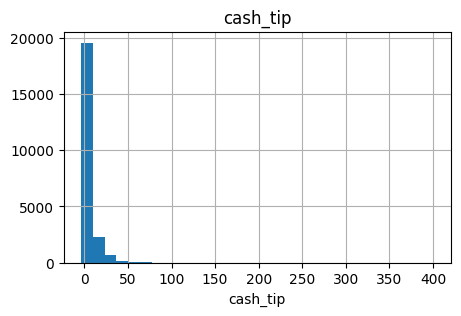

##################### trip_duration_minutes #####################
##################### Describe #####################
count   22699.00
mean       17.01
std        62.00
min       -16.98
25%         6.65
50%        11.18
75%        18.38
max      1439.55
Name: trip_duration_minutes, dtype: float64 


##################### Total NA #####################
0


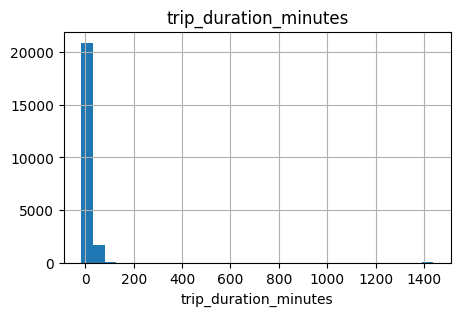

##################### passenger_count #####################
##################### Describe #####################
count   22699.00
mean        1.64
std         1.29
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         6.00
Name: passenger_count, dtype: float64 


##################### Total NA #####################
0


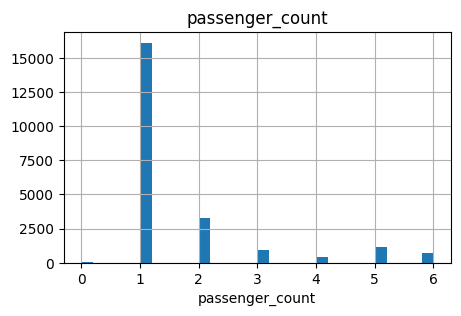

##################### extra #####################
##################### Describe #####################
count   22699.00
mean        0.33
std         0.46
min        -1.00
25%         0.00
50%         0.00
75%         0.50
max         4.50
Name: extra, dtype: float64 


##################### Total NA #####################
0


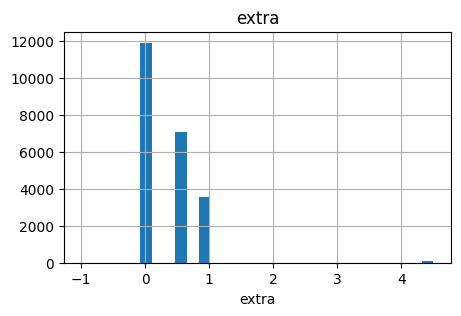

##################### mta_tax #####################
##################### Describe #####################
count   22699.00
mean        0.50
std         0.04
min        -0.50
25%         0.50
50%         0.50
75%         0.50
max         0.50
Name: mta_tax, dtype: float64 


##################### Total NA #####################
0


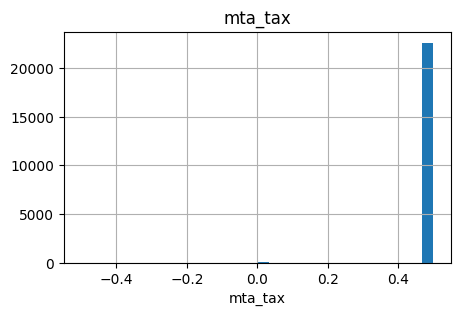

##################### improvement_surcharge #####################
##################### Describe #####################
count   22699.00
mean        0.30
std         0.02
min        -0.30
25%         0.30
50%         0.30
75%         0.30
max         0.30
Name: improvement_surcharge, dtype: float64 


##################### Total NA #####################
0


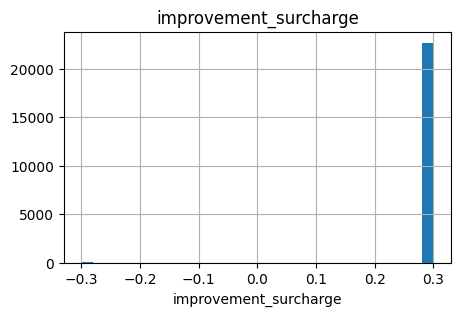

In [77]:
for col_name in num_cols:
    num_summary(df, col_name, plot=True, plot_type="hist")

 * trip_distance mostly less than 5 miles. Right skewed.  The number of trips falls away steeply as the distance traveled increases beyond two miles.
 * fare_amount; mostly less than 15 USD. Right skewed
 * tip_amount; mostly less than 3 USD. Right skewed
 * most of the rides don't have tools_amount
 * The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.
 * cash_tip; many customers prefer to give cash tips.
 * passenger_acount; mostly one passenger. Passanger information enter manually by driver thats why we have zero passengers.
 * trip_duration_minutes; most trips took less than 20 min
 * improvement_surcharge; it has one value of 0.3 and also gets -0.3 for refunds.


* How many refunds are there?

In [24]:
len(df[df['total_amount'] < 0])

14

### Outlier Analysis <a id="outliers"></a>

* The 'check_outlier' function checks if there are any outlier values in the specified column of a DataFrame based on quantile thresholds.
*  Checks if there are any outlier values in the specified column of a data frame based on quantile thresholds.

In [25]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_distance          22699 non-null  float64
 1   fare_amount            22699 non-null  float64
 2   tip_amount             22699 non-null  float64
 3   tolls_amount           22699 non-null  float64
 4   total_amount           22699 non-null  float64
 5   cash_tip               22699 non-null  float64
 6   trip_duration_minutes  22699 non-null  float64
 7   passenger_count        22699 non-null  int64  
 8   extra                  22699 non-null  float64
 9   mta_tax                22699 non-null  float64
 10  improvement_surcharge  22699 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.9 MB


In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Calculates the lower and upper thresholds for outlier detection based on quartile ranges.
    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the column to compute outlier thresholds.
    - col_name (str): The name of the column in the DataFrame for which to calculate outlier thresholds.
    - q1 (float, optional): The percentile value for the first quartile. Defaults to 0.25.
    - q3 (float, optional): The percentile value for the third quartile. Defaults to 0.75.

    Returns:
    - tuple: A tuple containing the lower and upper thresholds for outliers. """

    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Checks if there are any outlier values in the specified column of a DataFrame based on quantile thresholds.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame to check for outliers.
    - col_name (str): The name of the column in which to search for outliers.
    - q1 (float, optional): The lower quantile to use for calculating the outlier detection threshold. Defaults to 0.25.
    - q3 (float, optional): The upper quantile to use for calculating the outlier detection threshold. Defaults to 0.75.

    Returns:
    - bool: True if outliers are found in the specified column; False otherwise. 
    """
    if pd.api.types.is_datetime64_any_dtype(dataframe[col_name]):
        # Handle datetime data differently or skip
        print(f"Column {col_name} is of datetime type, which is not suitable for outlier detection based on quartiles.")
        return False
    else:
        low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1=q1, q3=q3)
        if (dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)] != pd.Timestamp(0)).any(axis=None):
            return True
        else:
            return False


In [33]:
# Find the outliers using the 'check_outlier' function and store them in a list.
outliers = []
for col_name in num_cols:
    result = check_outlier(df, col_name, q1=0.01, q3=0.99)
    if result == True:
        outliers.append(col_name)

In [34]:
outliers

['fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'cash_tip',
 'trip_duration_minutes',
 'extra',
 'mta_tax',
 'improvement_surcharge']

* For outliers I will this function with box plot

##################### trip_distance #####################
##################### Describe #####################
count   22699.00
mean        2.91
std         3.65
min         0.00
25%         0.99
50%         1.61
75%         3.06
max        33.96
Name: trip_distance, dtype: float64 


##################### Total NA #####################
0


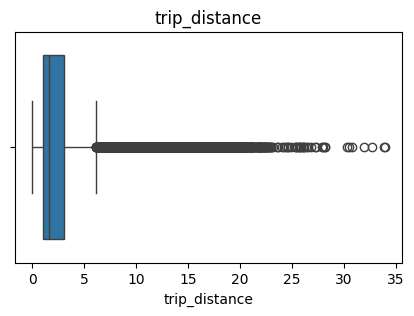

##################### fare_amount #####################
##################### Describe #####################
count   22699.00
mean       13.03
std        13.24
min      -120.00
25%         6.50
50%         9.50
75%        14.50
max       999.99
Name: fare_amount, dtype: float64 


##################### Total NA #####################
0


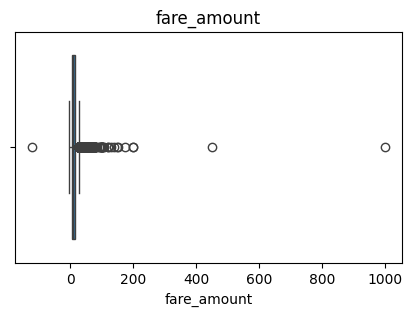

##################### tip_amount #####################
##################### Describe #####################
count   22699.00
mean        1.84
std         2.80
min         0.00
25%         0.00
50%         1.35
75%         2.45
max       200.00
Name: tip_amount, dtype: float64 


##################### Total NA #####################
0


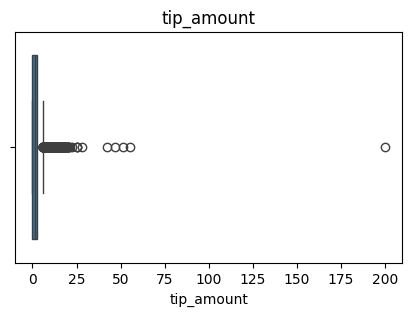

##################### tolls_amount #####################
##################### Describe #####################
count   22699.00
mean        0.31
std         1.40
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        19.10
Name: tolls_amount, dtype: float64 


##################### Total NA #####################
0


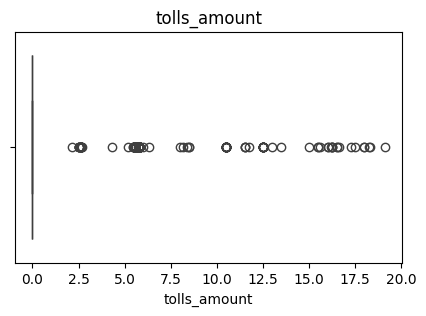

##################### total_amount #####################
##################### Describe #####################
count   22699.00
mean       16.31
std        16.10
min      -120.30
25%         8.75
50%        11.80
75%        17.80
max      1200.29
Name: total_amount, dtype: float64 


##################### Total NA #####################
0


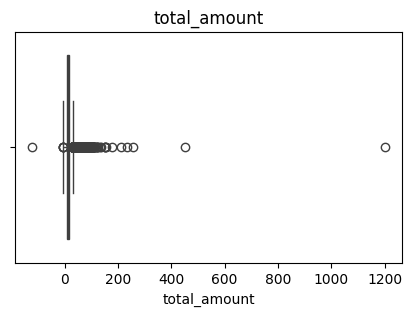

##################### cash_tip #####################
##################### Describe #####################
count   22699.00
mean        6.56
std         7.36
min        -3.60
25%         2.60
50%         5.00
75%         7.52
max       400.60
Name: cash_tip, dtype: float64 


##################### Total NA #####################
0


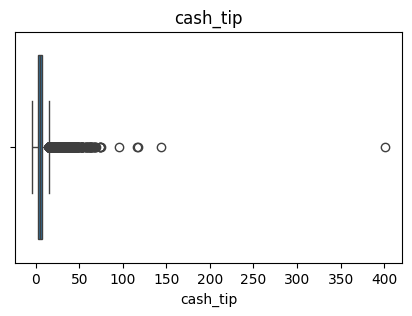

##################### trip_duration_minutes #####################
##################### Describe #####################
count   22699.00
mean       17.01
std        62.00
min       -16.98
25%         6.65
50%        11.18
75%        18.38
max      1439.55
Name: trip_duration_minutes, dtype: float64 


##################### Total NA #####################
0


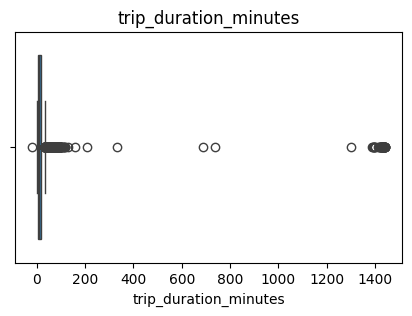

##################### passenger_count #####################
##################### Describe #####################
count   22699.00
mean        1.64
std         1.29
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         6.00
Name: passenger_count, dtype: float64 


##################### Total NA #####################
0


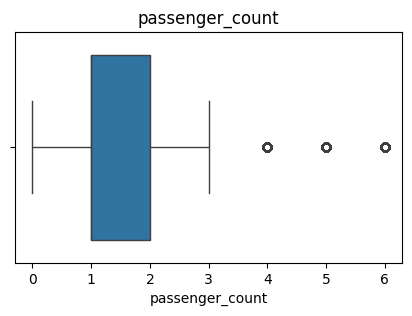

##################### extra #####################
##################### Describe #####################
count   22699.00
mean        0.33
std         0.46
min        -1.00
25%         0.00
50%         0.00
75%         0.50
max         4.50
Name: extra, dtype: float64 


##################### Total NA #####################
0


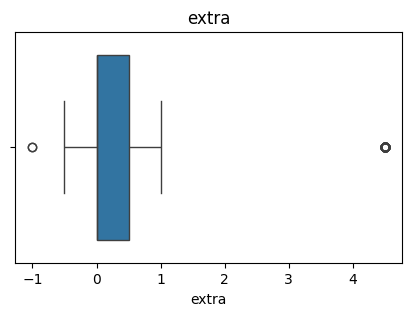

##################### mta_tax #####################
##################### Describe #####################
count   22699.00
mean        0.50
std         0.04
min        -0.50
25%         0.50
50%         0.50
75%         0.50
max         0.50
Name: mta_tax, dtype: float64 


##################### Total NA #####################
0


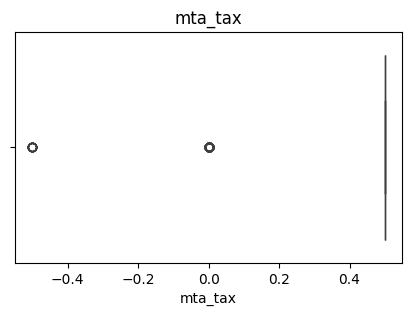

##################### improvement_surcharge #####################
##################### Describe #####################
count   22699.00
mean        0.30
std         0.02
min        -0.30
25%         0.30
50%         0.30
75%         0.30
max         0.30
Name: improvement_surcharge, dtype: float64 


##################### Total NA #####################
0


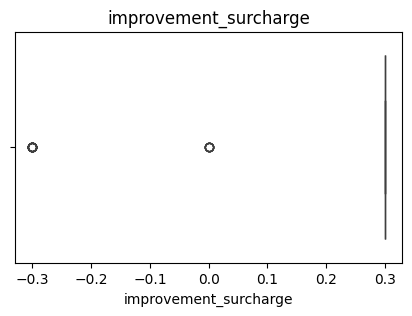

In [35]:
for col_name in num_cols:
    num_summary(df, col_name, plot=True, plot_type="box_plot")

In [83]:
cols_for_visual = [col for col in num_cols if col not in ['PULocationID', 'DOLocationID', 'cash_tip', 'extra', 'mta_tax', 'improvement_surcharge']]


### Looking pair plot in numerical variables

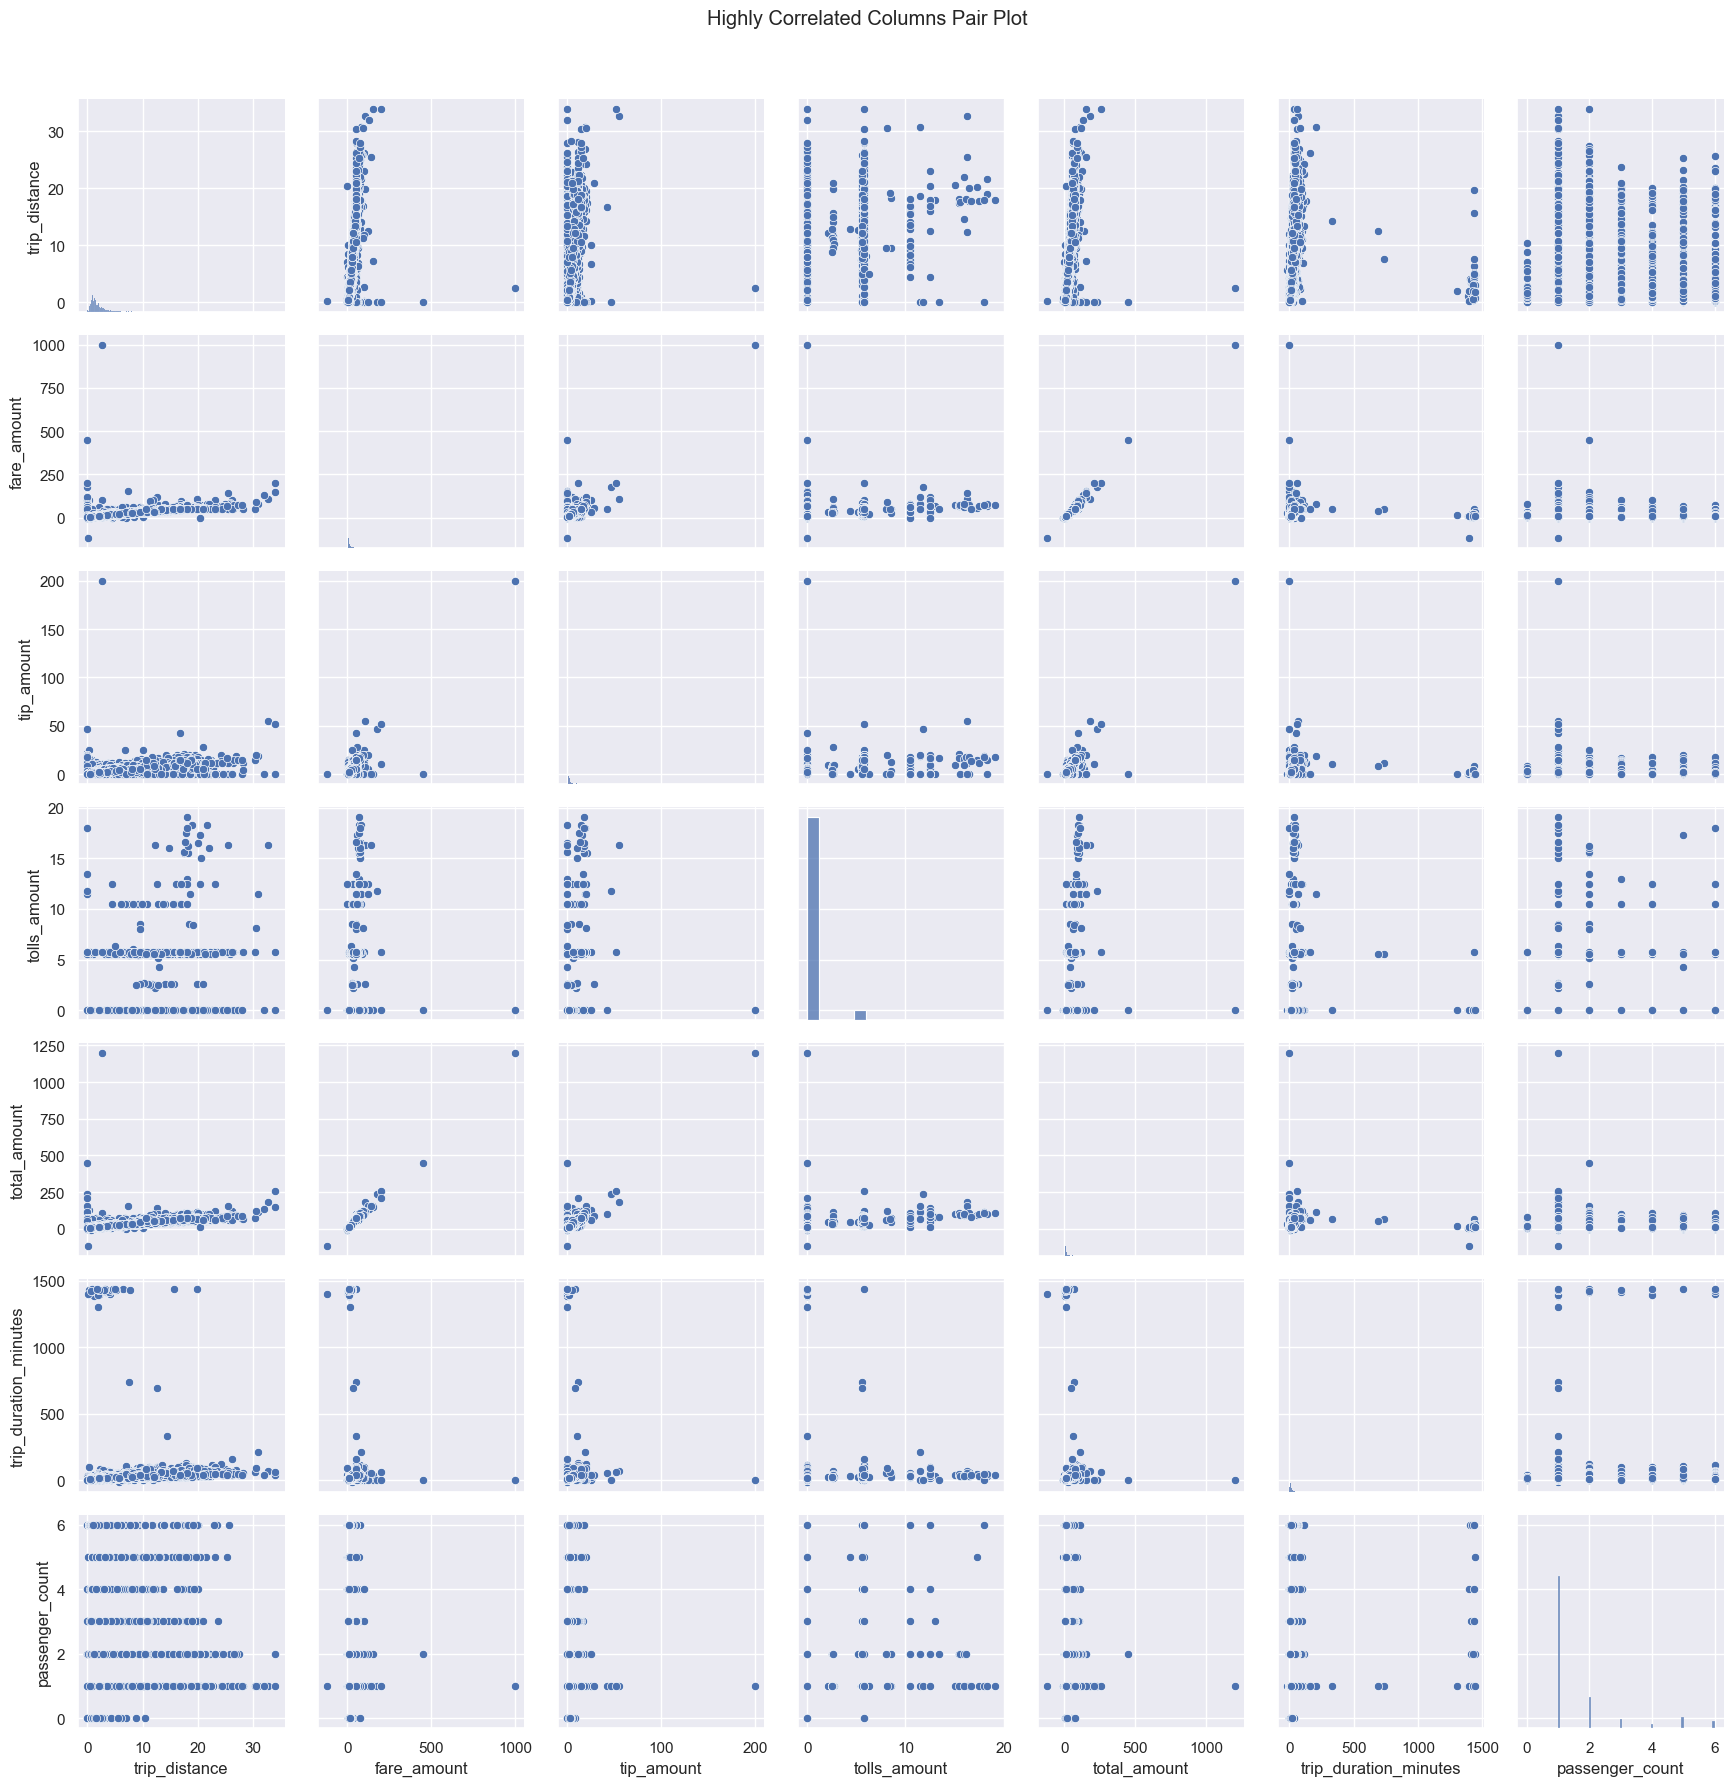

In [84]:
pairplot = sns.pairplot(df, vars=cols_for_visual,
            #hue='County'
            );
pairplot.fig.suptitle("Highly Correlated Columns Pair Plot", y=1.02) # y is used to adjust the position of the title
plt.tight_layout()
save_fig("high_correlated_plot")
plt.show()

### Finding highly correlated variables 

In [ ]:
# I created the 'high_correlated_cols' function to catch the high-correlated variables in our data set.
high_correlated_variables = high_correlated_cols(df[num_cols], plot=True, corr_th=0.80, 
                                                 fig_id="heatmap_numerical_columns",
                                                 IMAGES_PATH=IMAGES_PATH)

#### Create histogram of tip_amount by vendor

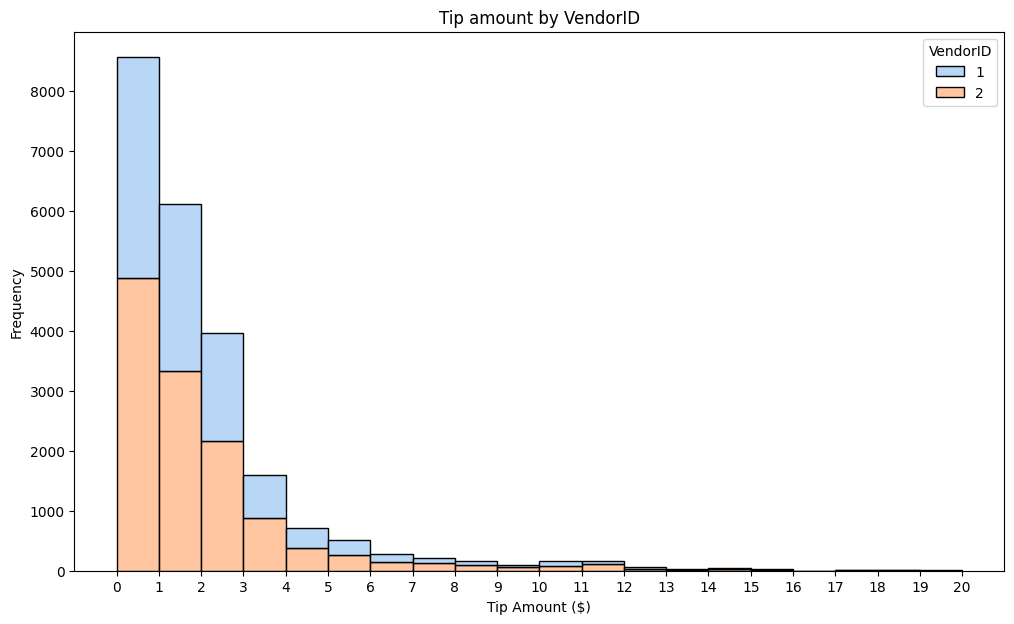

In [41]:
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=df, x='tip_amount', bins=(range(0,21,1)),
                 hue='VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
ax.set_xlabel('Tip Amount ($)')
ax.set_ylabel('Frequency')
plt.title('Tip amount by VendorID')
plt.show();

 * Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

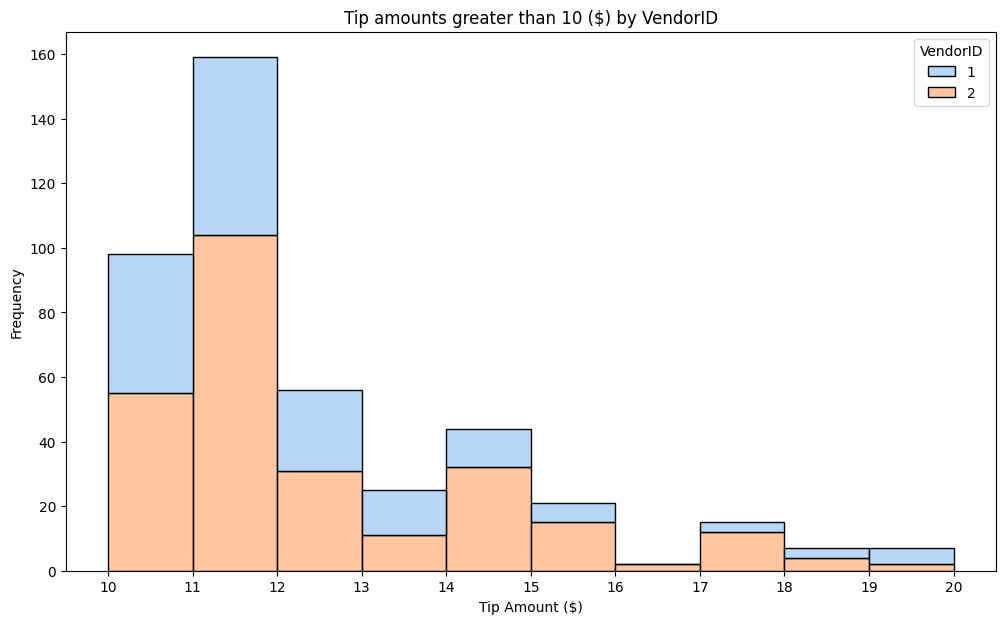

In [43]:
# Create histogram of tip_amount by vendor for tips > $10 
data = df[df['tip_amount'] > 10]
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=data, x='tip_amount', bins=(range(10,21,1)),
                 hue='VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
ax.set_xlabel('Tip Amount ($)')
ax.set_ylabel('Frequency')
plt.title('Tip amounts greater than 10 ($) by VendorID')
plt.show();

* The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

#### Mean tips by passenger count

In [78]:
df.groupby('passenger_count')['tip_amount'].mean().reset_index().sort_values(by='tip_amount', ascending=False)

,passenger_count,tip_amount
0,0,2.14
5,5,1.87
2,2,1.86
1,1,1.85
6,6,1.72
3,3,1.72
4,4,1.53


In [87]:
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean().reset_index()

In [88]:
mean_tips_by_passenger_count

,passenger_count,tip_amount
0,0,2.14
1,1,1.85
2,2,1.86
3,3,1.72
4,4,1.53
5,5,1.87
6,6,1.72


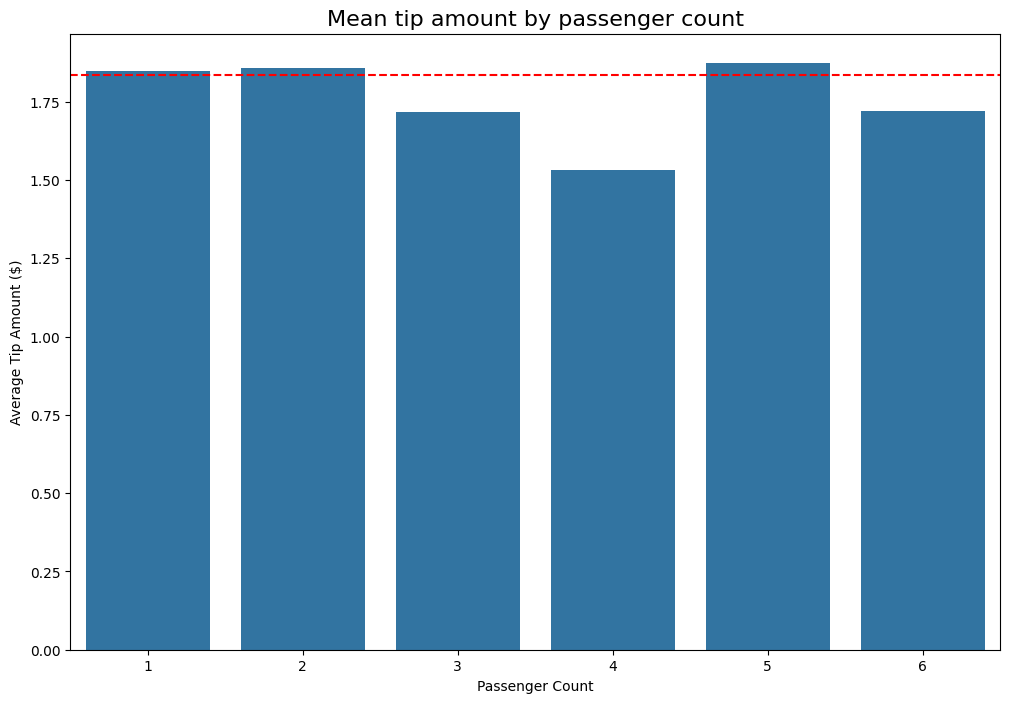

In [91]:

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=mean_tips_by_passenger_count[mean_tips_by_passenger_count['passenger_count'] > 0], 
                 x='passenger_count',
                 y= 'tip_amount',)
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Average Tip Amount ($)')
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
plt.title('Mean tip amount by passenger count', fontsize=16);
plt.show();

**note:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

### Plot the revenue by day of the week

In [30]:
total_amount_day = df.groupby('day')['total_amount'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = total_amount_day.reindex(index=day_order)

In [39]:
#make it dataframe for visualization
total_amount_day = pd.DataFrame(total_amount_day).reset_index()

In [38]:
total_amount_day

,day,total_amount
0,Monday,49574.37
1,Tuesday,52527.14
2,Wednesday,55310.47
3,Thursday,57181.91
4,Friday,55818.74
5,Saturday,51195.40
6,Sunday,48624.06


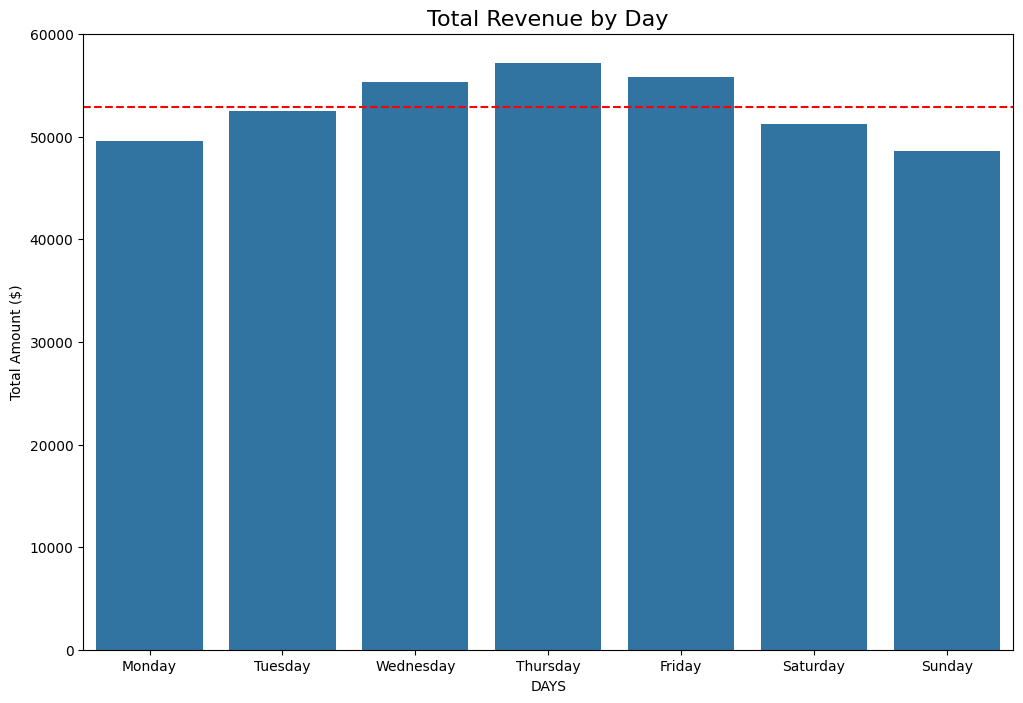

In [43]:
#Plot the revenue by day of the week
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=total_amount_day, 
                 x='day',
                 y= 'total_amount')
ax.set_xlabel('DAYS')
ax.set_ylabel('Total Amount ($)')
ax.axhline(total_amount_day['total_amount'].mean(), ls='--', color='red', label='global mean')
plt.title('Total Revenue by Day', fontsize=16);
plt.show();

 * Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Plot total revenue by month**

In [44]:
total_amount_mount = df.groupby('month')['total_amount'].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
total_amount_mount = total_amount_mount.reindex(index=month_order)

In [46]:
#make it dataframe for visualization
total_amount_mount = pd.DataFrame(total_amount_mount).reset_index()

In [47]:
total_amount_mount.head()

,month,total_amount
0,January,31735.25
1,February,28937.89
2,March,33085.89
3,April,32012.54
4,May,33828.58


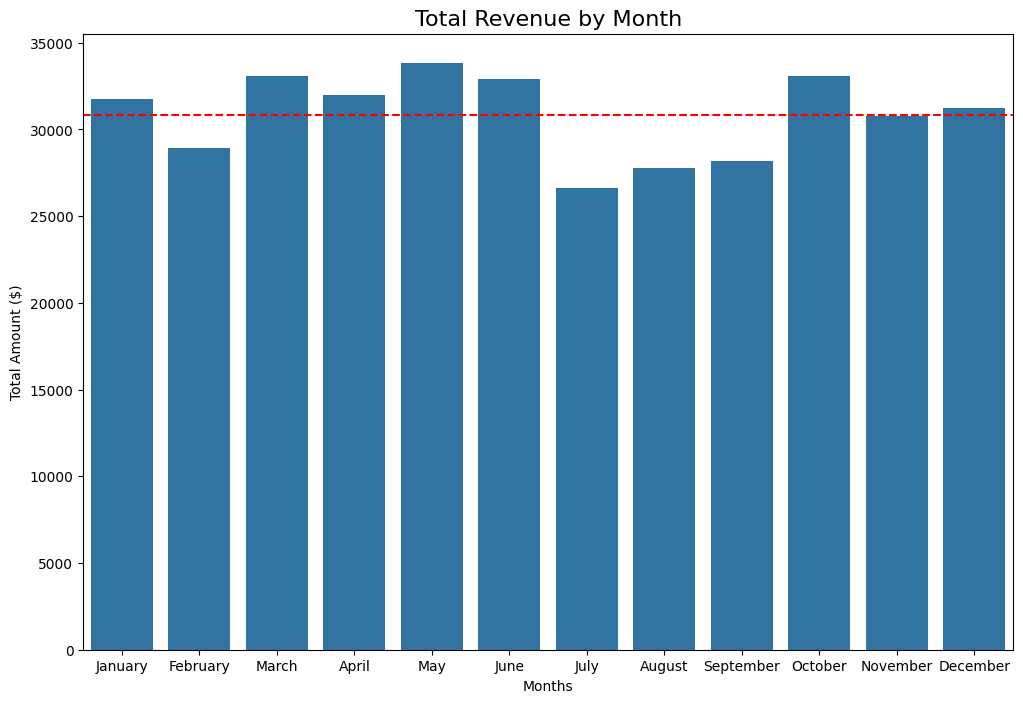

In [48]:
#Plot the revenue by day of the month
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=total_amount_mount, 
                 x='month',
                 y= 'total_amount')
ax.set_xlabel('Months')
ax.set_ylabel('Total Amount ($)')
ax.axhline(total_amount_mount['total_amount'].mean(), ls='--', color='red', label='global mean')
plt.title('Total Revenue by Month', fontsize=16);
plt.show();

 * May had the highest gross revenue of all months, and July, August, September, and February had the least.

**Plot mean trip distance by drop-off location**

In [61]:
mean_trips_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean()
#make it dataframe for visualization
mean_trips_by_dropoff = pd.DataFrame(mean_trips_by_dropoff).reset_index().sort_values(by='trip_distance')

In [62]:
df['DOLocationID'].nunique()

216

In [68]:
mean_trips_by_dropoff['DOLocationID'].describe()

count   216.00
mean    134.44
std      76.88
min       1.00
25%      67.75
50%     135.50
75%     201.25
max     265.00
Name: DOLocationID, dtype: float64

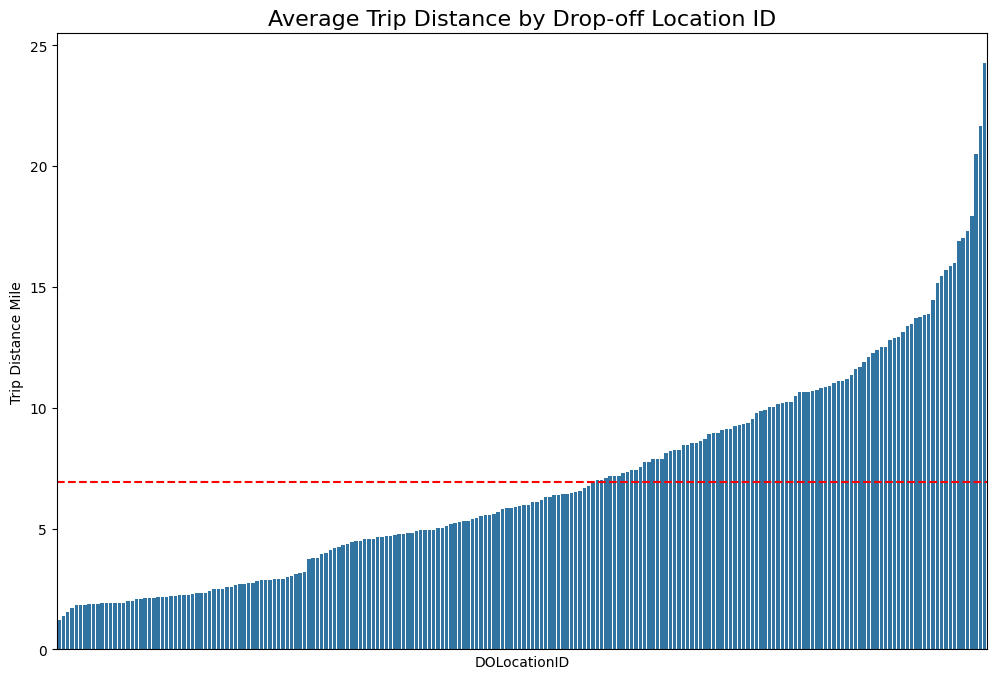

In [67]:
#Plot the revenue by day of the month
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=mean_trips_by_dropoff, 
                 x='DOLocationID',
                 y= 'trip_distance',
                order=mean_trips_by_dropoff['DOLocationID'])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel('Trip Distance Mile')
ax.axhline(mean_trips_by_dropoff['trip_distance'].mean(), ls='--', color='red', label='global mean')
plt.title('Average Trip Distance by Drop-off Location ID', fontsize=16);
plt.show();

* The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.

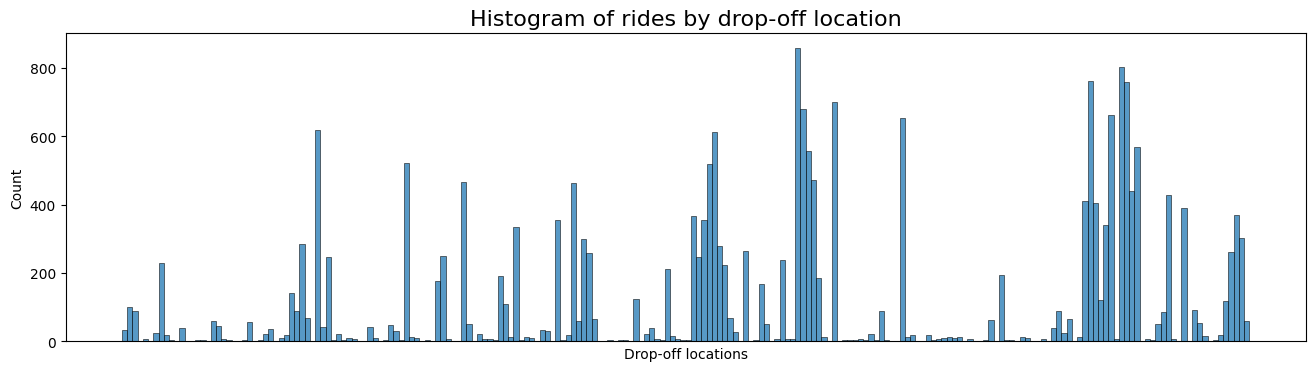

In [78]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

*  Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. These high-traffic locations are likely near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

In [ ]:
# def find_correlation(dataframe, numeric_cols, corr_limit=0.60):
#     high_correlations = []
#     low_correlations = []
#     for col in numeric_cols:
#         if col == "SalePrice":
#             pass
#         else:
#             correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
#             print(col, correlation)
#             if abs(correlation) > corr_limit:
#                 high_correlations.append(col + ": " + str(correlation))
#             else:
#                 low_correlations.append(col + ": " + str(correlation))
#     return low_correlations, high_correlations